In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Pre-processing & ModeL loading

In [62]:
df=pd.read_csv("/content/Mall_Customers.csv")

In [63]:
df.shape

(200, 5)

In [5]:
df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
8,9,Male,64,19,3
100,101,Female,23,62,41
75,76,Male,26,54,54
135,136,Female,29,73,88
157,158,Female,30,78,78


In [6]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Exploratory Data Analysis

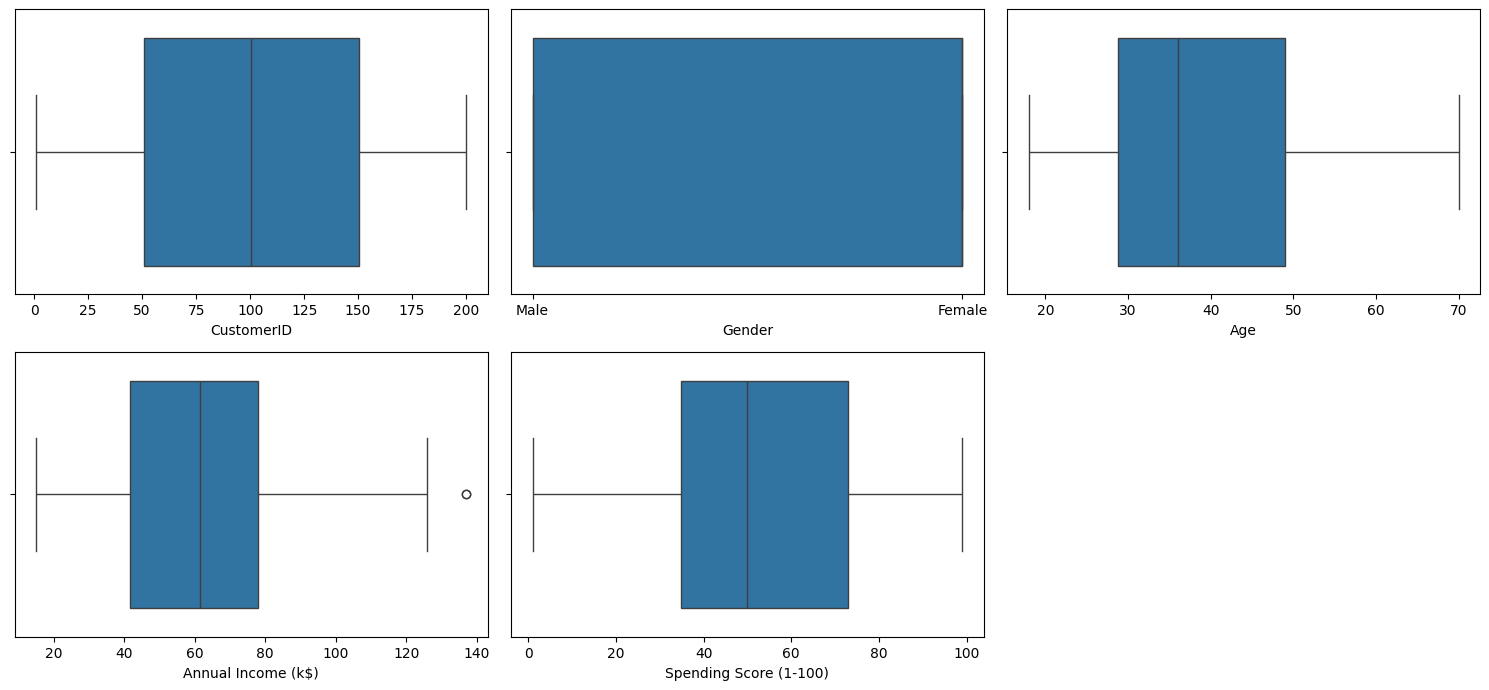

In [11]:
plt.subplots(figsize=(15,10))
for key,value in enumerate(df.columns):
  plt.subplot(3,3,key+1)
  sns.boxplot(df[value],orient="h")
  plt.tight_layout()


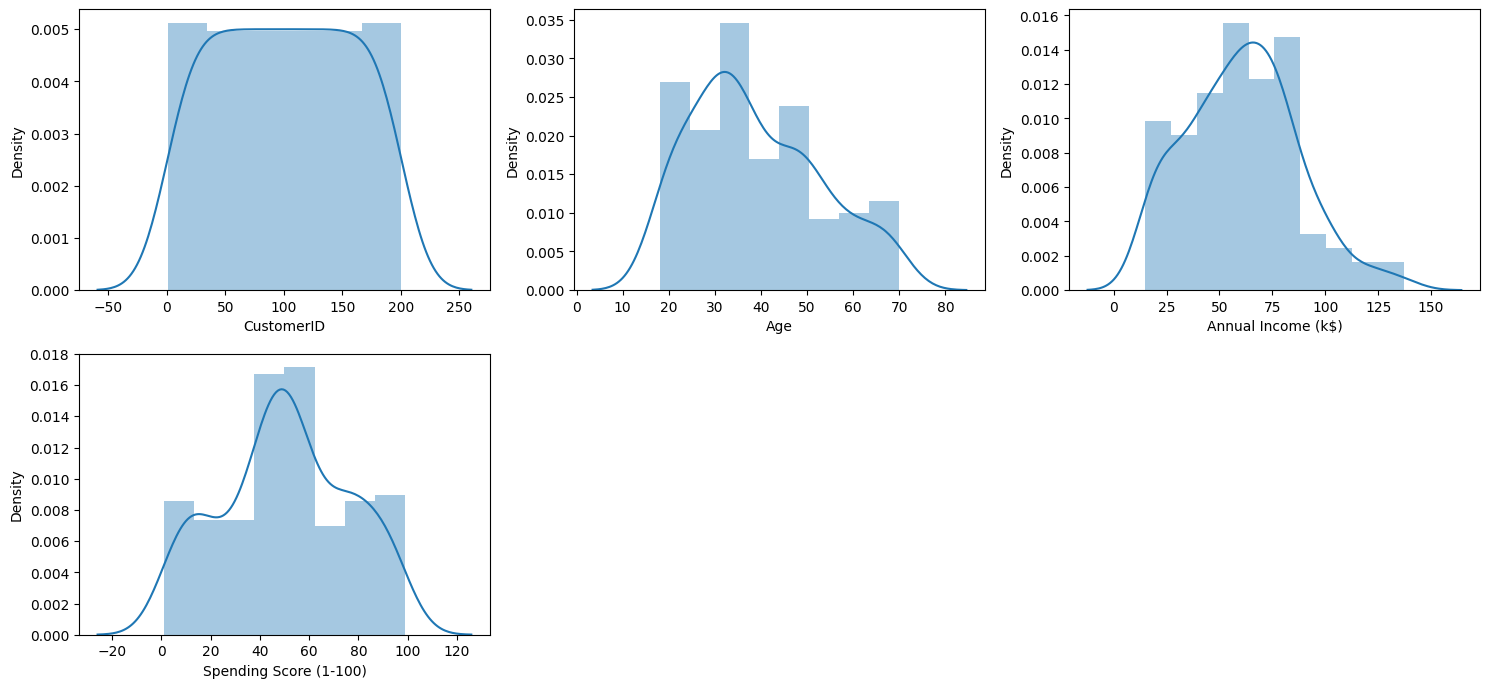

In [18]:
new_data = df.drop(columns=["Gender"])
plt.subplots(figsize=(15,10))
for key,value in enumerate(new_data.columns):
  plt.subplot(3,3,key+1)
  sns.distplot(df[value])
  plt.tight_layout()


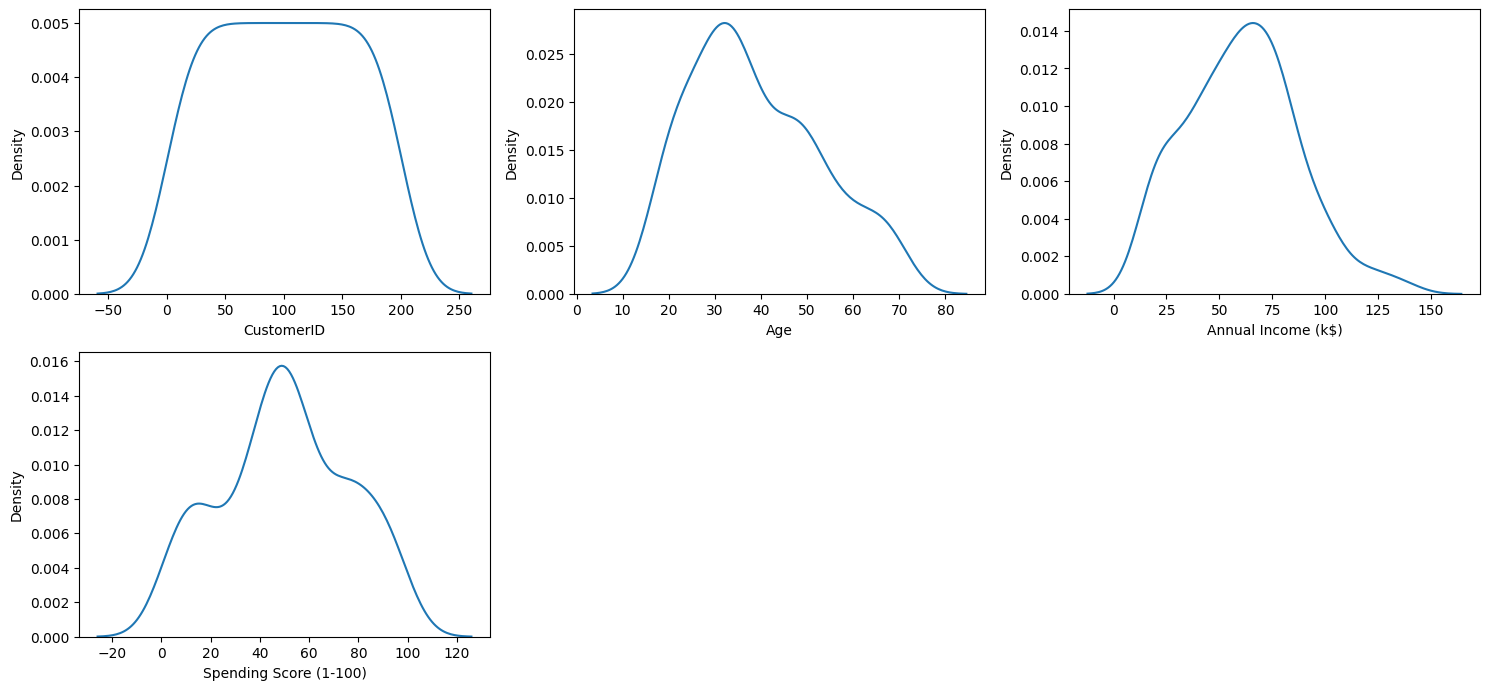

In [19]:
new_data = df.drop(columns=["Gender"])
plt.subplots(figsize=(15,10))
for key,value in enumerate(new_data.columns):
  plt.subplot(3,3,key+1)
  sns.kdeplot(df[value])
  plt.tight_layout()

In [21]:
#check the multicolinearity and linearity in data.
new_data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

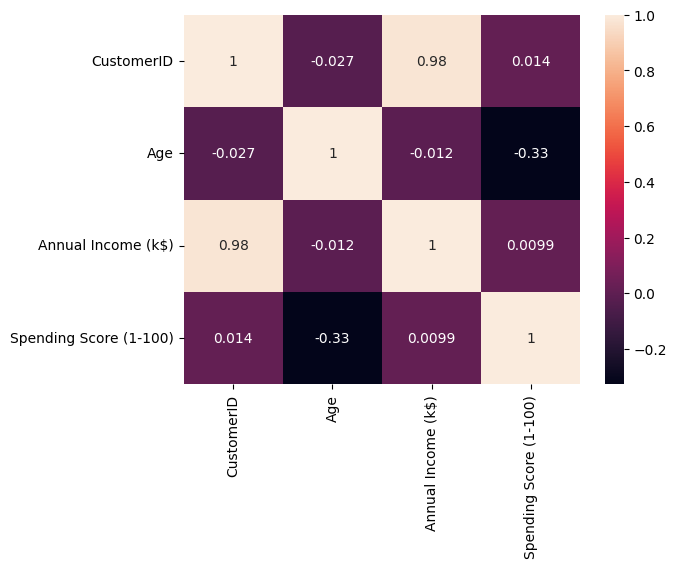

In [22]:
sns.heatmap(new_data.corr(),annot=True)

In [68]:
df.drop(columns=["CustomerID","Age"],inplace=True)

In [69]:
df.sample(2)

,Gender,Annual Income (k$),Spending Score (1-100)
1,Male,15,81
107,Male,63,46


In [70]:
df.drop(columns=["Gender"],inplace=True)

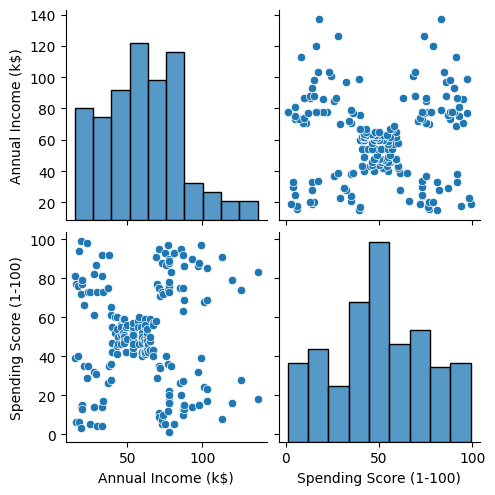

In [71]:
sns.pairplot(df)

<Axes: >

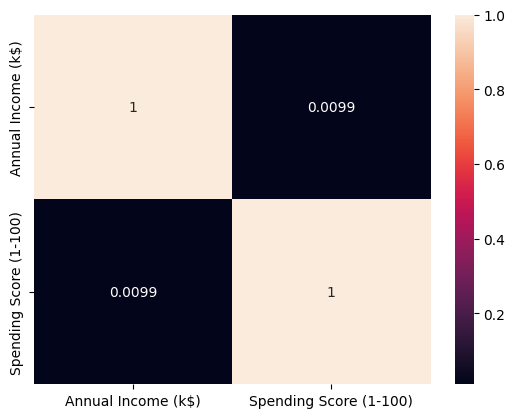

In [72]:
sns.heatmap(df.corr(),annot=True)


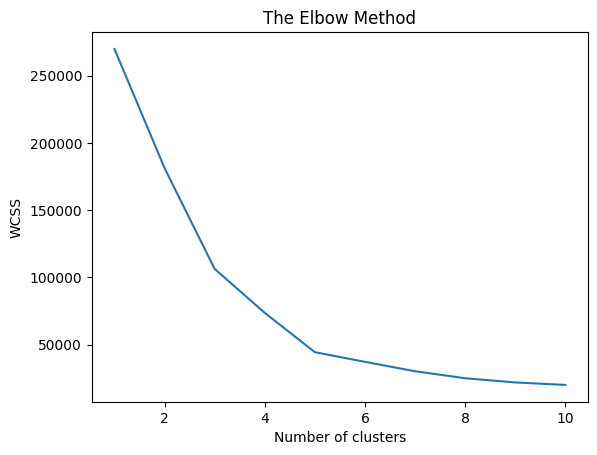

In [73]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()


# Now Applaying Algoritham to data

(array([0, 1, 2, 3, 4], dtype=int32), array([81, 39, 22, 35, 23]))


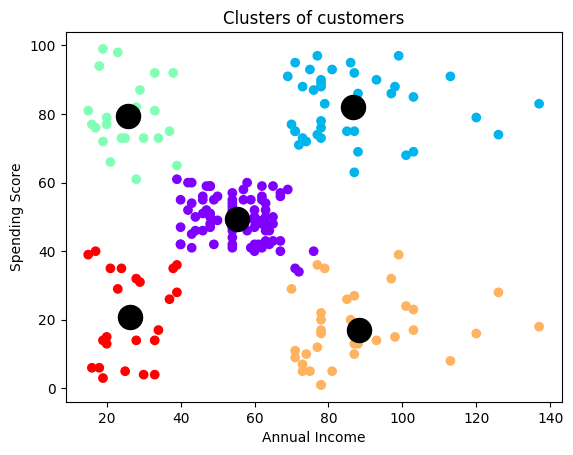

In [94]:
kmeans=KMeans(n_clusters=5,init="k-means++",random_state=42)
y_kmeans=kmeans.fit_predict(df)




#count the length of 0 1 2 3
print(np.unique(y_kmeans,return_counts=True))

#plotting all the cluster and their centroids
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=y_kmeans,cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c="black")
plt.title("Clusters of customers")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

In [82]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score
print("silhouette_score: ",silhouette_score(df,y_kmeans))
print("calinski_harabasz_score: ",calinski_harabasz_score(df,y_kmeans))

silhouette_score:  0.553931997444648
calinski_harabasz_score:  247.35899338037288


In [92]:
print(kmeans.cluster_centers_)

[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]
